## The first method to remove the watermark

In [8]:
import cv2
import numpy as np
from PIL import Image
import os
dir = os.getcwd()
path = "picture1/3.jpeg"
newPath = "final/3.png"
img = cv2.imread(path, 1)
height, width, depth = img.shape[0:3]

cropped = img[450:570, 25:205] 
# 裁剪坐标为[y0:y1, x0:x1]
cv2.imwrite(newPath, cropped)
imgSY = cv2.imread(newPath, 1)
# 图片二值化处理，把[200,200,200]-[250,250,250]以外的颜色变成0
thresh = cv2.inRange(imgSY, np.array([180, 180, 180]), np.array([250, 250, 250]))
# 创建形状和尺寸的结构元素
kernel = np.ones((3, 3), np.uint8)
# 扩展待修复区域
hi_mask = cv2.dilate(thresh, kernel, iterations=10)
specular = cv2.inpaint(imgSY, hi_mask, 5, flags=cv2.INPAINT_TELEA)
cv2.imwrite(newPath, specular)
# 覆盖图片
imgSY = Image.open(newPath)
img = Image.open(path)
img.paste(imgSY, (25, 450, 205, 570))
img.save(newPath)

## The method to color the selected area

In [25]:
import cv2,os
 
'''
读取文件夹下图片，对文件夹下所有图片进行指定区域涂色，并保存到指定路径
'''
def read_path(file_pathname):
    #Traverse all image files in this directory
    i = 0
    for filename in os.listdir(file_pathname):
        print(filename)
        i = i+1
        img = cv2.imread(file_pathname+'/'+filename)
        #img(selected area) = (RGB color)
        img = cv2.resize(img, (879, 586))
        img[450:570, 20:140] = (0,0,0)
        #save figure
        cv2.imwrite('./AMD_black'+"/"+ filename[0:-4] + 'png',img)       
read_path("./AMD")

AMRD1.jpeg
AMRD10.jpeg
AMRD11.jpeg
AMRD12.jpeg
AMRD13.jpeg
AMRD14.jpeg
AMRD15.jpeg
AMRD16.jpeg
AMRD17.jpeg
AMRD18.jpeg
AMRD19.jpeg
AMRD2.jpeg
AMRD20.jpeg
AMRD21.jpeg
AMRD22.jpeg
AMRD23.jpeg
AMRD24.jpeg
AMRD25.jpeg
AMRD26.jpeg
AMRD27.jpeg
AMRD28.jpeg
AMRD29.jpeg
AMRD3.jpeg
AMRD30.jpeg
AMRD31.jpeg
AMRD32.jpeg
AMRD33.jpeg
AMRD34.jpeg
AMRD35.jpeg
AMRD36.jpeg
AMRD37.jpeg
AMRD38.jpeg
AMRD39.jpeg
AMRD4.jpeg
AMRD40.jpeg
AMRD41.jpeg
AMRD42.jpeg
AMRD43.jpeg
AMRD44.jpeg
AMRD45.jpeg
AMRD46.jpeg
AMRD47.jpeg
AMRD48.jpeg
AMRD49.jpeg
AMRD5.jpeg
AMRD50.jpeg
AMRD51.jpeg
AMRD52.jpeg
AMRD53.jpeg
AMRD54.jpeg
AMRD55.jpeg
AMRD6.jpeg
AMRD7.jpeg
AMRD8.jpeg
AMRD9.jpeg


In [24]:
def read_path(file_pathname):
    #Traverse all image files in this directory
    i = 0
    for filename in os.listdir(file_pathname):
        print(filename)
        i = i+1
        img = cv2.imread(file_pathname+'/'+filename)
        img = cv2.resize(img, (879, 586))
#         img=img.resize((879, 586))
        #img(selected area) = (RGB color)
        img[450:570, 20:140] = (0,0,0)
        #save figure
        cv2.imwrite('./final'+"/"+ filename[0:-4] + 'png',img)       
read_path("./picture1")

3.jpeg


## The second method to remove the watermark

In [10]:
import numpy as np

def svt(mat, tau):
    u, s, v = np.linalg.svd(mat, full_matrices = 0)
    vec = s - tau
    vec[vec < 0] = 0
    return np.matmul(np.matmul(u, np.diag(vec)), v)

def LRMC(sparse_mat, dense_mat, rho, maxiter):
    
    pos_train = np.where(sparse_mat != 0)
    pos_test = np.where((sparse_mat == 0) & (dense_mat != 0))
    binary_mat = sparse_mat.copy()
    binary_mat[pos_train] = 1
    
    X = sparse_mat.copy()
    Z = sparse_mat.copy()
    T = sparse_mat.copy()
    rse = np.zeros(maxiter)
    
    for it in range(maxiter):
        Z = svt(X + T / rho, 1 / rho)
        X = Z - T / rho
        X[pos_train] = sparse_mat[pos_train]
        T = T - rho * (Z - X)
        rse[it] = (np.linalg.norm(X[pos_test] - dense_mat[pos_test], 2) 
                   / np.linalg.norm(dense_mat[pos_test], 2))
    return X, rse

The shape of the image is (586, 879, 3).


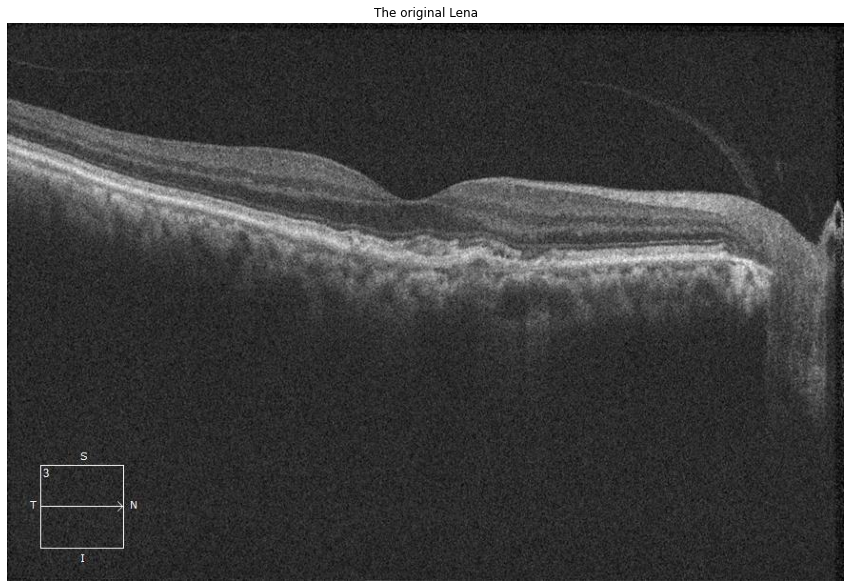

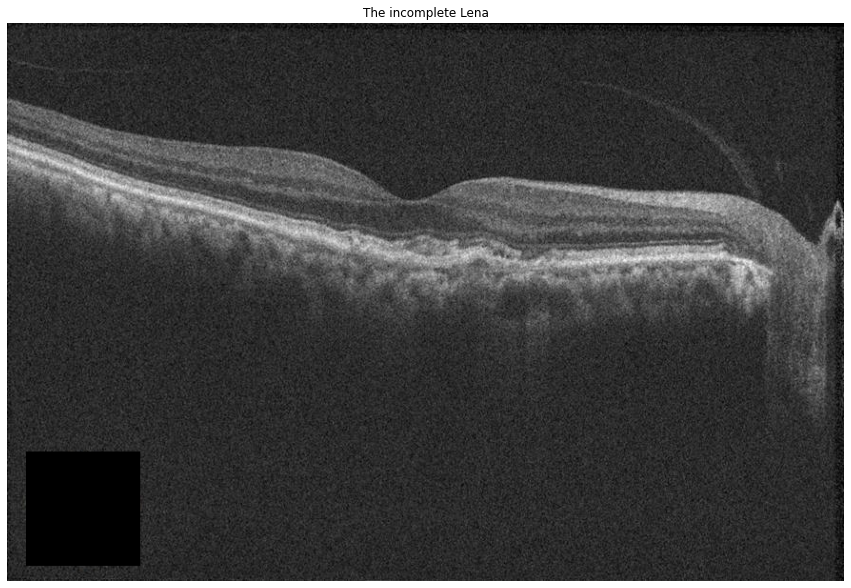

In [16]:
import imageio
import matplotlib.pyplot as plt

lena = imageio.imread('picture1/3.jpeg')/255.0
sparse_lena=imageio.imread('final/3.png')/255.0
print('The shape of the image is {}.'.format(lena.shape))

dim1, dim2,dim3 = lena.shape
mask = np.round(np.random.rand(dim1, dim2,dim3))  # Generate a binary mask.
mask1 = np.round(np.random.rand(dim1, dim2,dim3))
# mask2 = np.round(np.random.rand(dim1, dim2))

plt.figure(figsize=(15,12))
plt.imshow(lena)
plt.title('The original Lena')
plt.axis('off')

plt.figure(figsize=(15,12))
plt.imshow(sparse_lena)
plt.title('The incomplete Lena')
plt.axis("off")

plt.show()

In [17]:
import time

start = time.time()
rho = 0.005
maxiter = 50
mat_hat, rse_svt = LRMC(sparse_lena[:,:,0], lena[:,:,0], rho, maxiter)

mat_hat1, rse_svt1 = LRMC(sparse_lena[:,:,1], lena[:,:,1], rho, maxiter)

mat_hat2, rse_svt2 = LRMC(sparse_lena[:,:,2], lena[:,:,2], rho, maxiter)

#修复完把三张图拼接在一起
c=[]
for i in range(dim1):
    c.append([])
    for j in range(dim2):
        c[i].append([mat_hat[i][j],mat_hat1[i][j],mat_hat2[i][j]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


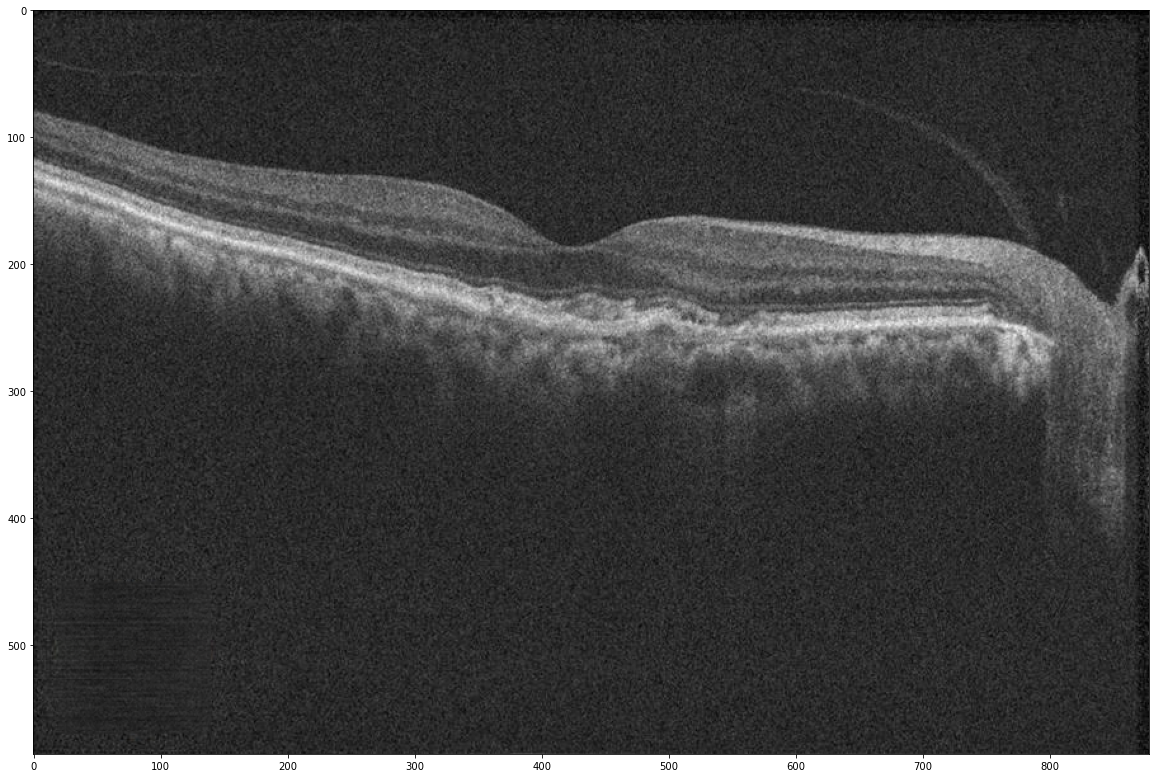

In [19]:
plt.figure(figsize=(20,15))
# plt.imshow(mat_hat)
plt.imshow(c)
# plt.imshow(mat_hat2)
plt.savefig("lbk.png")
# plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


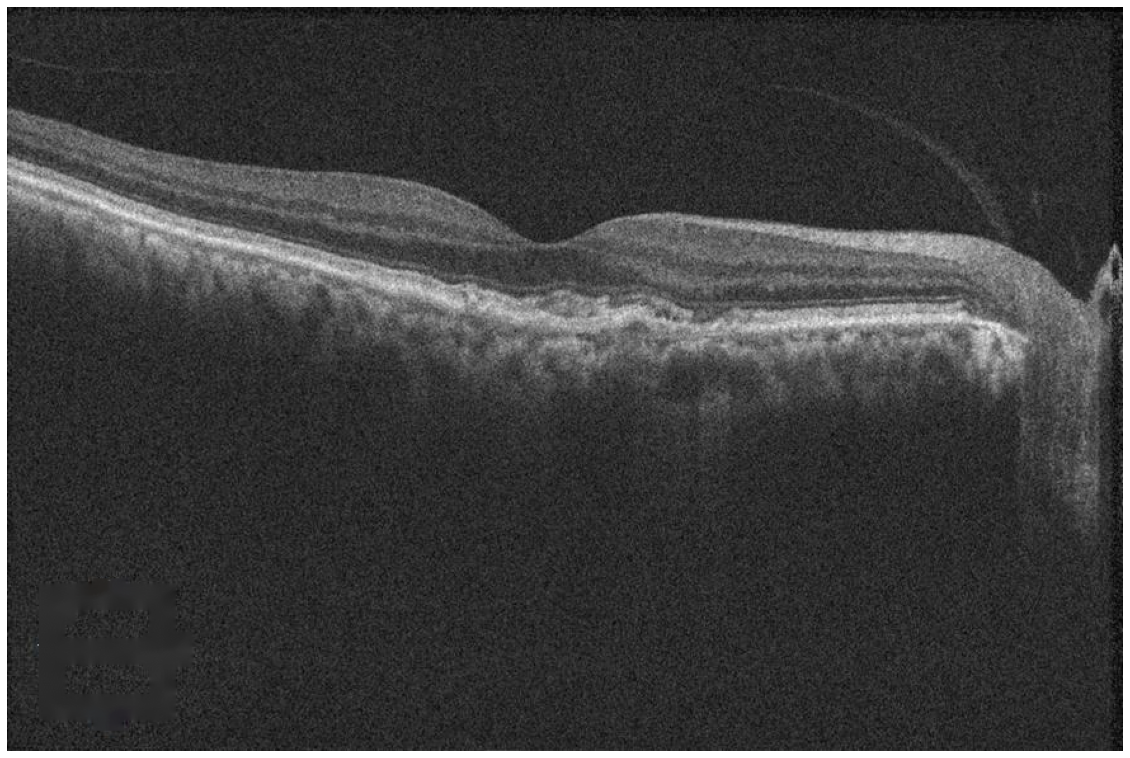

In [74]:
plt.figure(figsize=(20,15))
# plt.imshow(mat_hat)
plt.imshow(c)
# plt.imshow(mat_hat2)
plt.axis('off')
plt.savefig("lbk.png")
plt.axis('off')
plt.show()

In [51]:
img = cv2.imread('picture1/3.jpeg')

In [53]:
img[450:570, 20:140] = (0,0,0)
cv2.imshow('cat',img)
cv2.waitKey()

-1

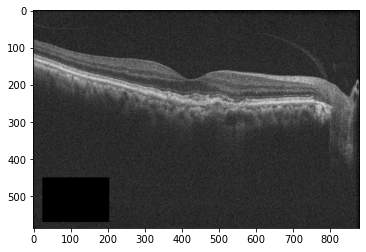

In [21]:
import cv2,os
import matplotlib.pyplot as plt
from  PIL import  Image
import numpy as np
img = Image.open('picture1/3.jpeg')
img = np.asarray(img).copy()
img[450:570, 25:205] = (0,0,0)
fig,ax = plt.subplots(1,1)
ax.imshow(img)
plt.savefig('save.jpeg')
plt.show()
# plt.savefig('save.jpg')